In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
#from sklearn.metrics import accuracy_score

In [106]:
dataset = np.loadtxt('diabetes_binary_5050split_health_indicators_BRFSS2015.csv', delimiter=",", skiprows=1)
np.random.shuffle(dataset)
dataset

array([[ 0.,  1.,  1., ...,  7.,  3.,  4.],
       [ 0.,  1.,  1., ..., 13.,  5.,  5.],
       [ 1.,  1.,  1., ..., 10.,  6.,  6.],
       ...,
       [ 1.,  1.,  0., ...,  7.,  5.,  1.],
       [ 0.,  1.,  1., ...,  6.,  4.,  8.],
       [ 1.,  0.,  0., ...,  6.,  4.,  7.]])

In [108]:
df = pd.read_csv("diabetes_binary_5050split_health_indicators_BRFSS2015.csv", sep=",")
df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


0.5


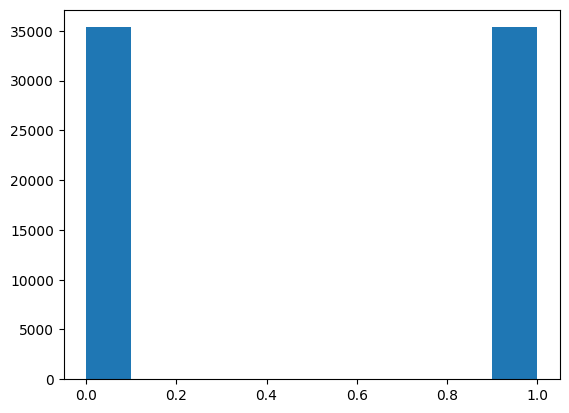

In [109]:
print(sum(Y_Overfit)/70692)

plt.hist(df['Diabetes_binary'])
plt.show()

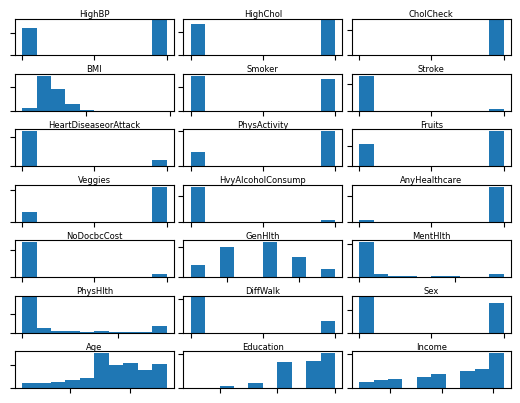

In [110]:
header = list(df.columns)

fig = plt.figure()
fig.subplots_adjust(hspace=0.5, wspace=0.06)

for i in range(21):
  plt.subplot(7, 3, i+1)
  plt.hist(df[header[i+1]])
  plt.title(header[i+1], fontsize=6, pad=1.1) 
  ax = plt.gca()
  ax.axes.xaxis.set_ticklabels([])
  ax.axes.yaxis.set_ticklabels([])

In [121]:
twenty_percent = int(len(dataset[:, 0]) * 0.2)

X_Overfit = dataset[:, 1:]
Y_Overfit = dataset[:, 0]

In [122]:
normalized_col = [3, 13, 14, 15, 18, 19, 20]

for i in range(21):
  X_Overfit[:, i] = X_Overfit[:, i] / X_Overfit[:, i].max()
  #print(X_Overfit[:, i])
  #print()

# **Initial Overfit Trial**

In [123]:
model = Sequential()
model.add(Dense(1, input_dim = len(X_Overfit[0, :]), activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [125]:
model.fit(x = X_Overfit, y = Y_Overfit, epochs=16, verbose = 1)
#batch_size= 129 

Epoch 1/16
2210/2210 [==============================] - 4s 2ms/step - loss: 0.5350 - accuracy: 0.7344
Epoch 2/16
2210/2210 [==============================] - 3s 1ms/step - loss: 0.5334 - accuracy: 0.7354
Epoch 3/16
2210/2210 [==============================] - 4s 2ms/step - loss: 0.5320 - accuracy: 0.7359
Epoch 4/16
2210/2210 [==============================] - 3s 1ms/step - loss: 0.5308 - accuracy: 0.7369
Epoch 5/16
2210/2210 [==============================] - 3s 1ms/step - loss: 0.5296 - accuracy: 0.7379
Epoch 6/16
2210/2210 [==============================] - 3s 1ms/step - loss: 0.5286 - accuracy: 0.7381
Epoch 7/16
2210/2210 [==============================] - 4s 2ms/step - loss: 0.5276 - accuracy: 0.7382
Epoch 8/16
2210/2210 [==============================] - 3s 1ms/step - loss: 0.5268 - accuracy: 0.7391
Epoch 9/16
2210/2210 [==============================] - 3s 1ms/step - loss: 0.5260 - accuracy: 0.7398
Epoch 10/16
2210/2210 [==============================] - 3s 2ms/step - loss: 0.525

In [126]:
overfit_predict = (model.predict(X_Overfit) > 0.5).astype(int)
overfit_predict


#hello = sum(overfit_predict) / 70692

#print(hello)
accuracy_score(Y_Overfit, overfit_predict)

print('Final accuracy was found to be: ', accuracy_score(Y_Overfit, overfit_predict))

2210/2210 [==============================] - 3s 2ms/step
Final accuracy was found to be:  0.7412578509590901


In [127]:
# The function only works for models with more than one layer.
def test_model(neuron_arr, input_length, X, Y, num_epochs, num_batch, is_verbose):
  my_model = Sequential()
  my_model.add(Dense(neuron_arr[0], input_dim = input_length, activation='relu'))
  #
  for i in range(1, len(neuron_arr)):
    my_model.add(Dense(neuron_arr[i], activation='sigmoid'))
  #
  my_model.add(Dense(1, activation='sigmoid'))
  my_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
  my_model.fit(x=X, y=Y, epochs=num_epochs, batch_size=num_batch, verbose=is_verbose, shuffle=True)
  overfit_predict = (my_model.predict(X) > 0.5).astype(int)
  print('Final accuracy was found to be: ', accuracy_score(Y, overfit_predict))

In [139]:
test_model([2, 1], len(X_Overfit[0, :]), X_Overfit, Y_Overfit, 16, 32, 1)

Epoch 1/16
2210/2210 [==============================] - 4s 2ms/step - loss: 0.6163 - accuracy: 0.6754
Epoch 2/16
2210/2210 [==============================] - 3s 2ms/step - loss: 0.5571 - accuracy: 0.7261
Epoch 3/16
2210/2210 [==============================] - 4s 2ms/step - loss: 0.5417 - accuracy: 0.7334
Epoch 4/16
2210/2210 [==============================] - 3s 2ms/step - loss: 0.5333 - accuracy: 0.7369
Epoch 5/16
2210/2210 [==============================] - 3s 2ms/step - loss: 0.5283 - accuracy: 0.7392
Epoch 6/16
2210/2210 [==============================] - 4s 2ms/step - loss: 0.5247 - accuracy: 0.7408
Epoch 7/16
2210/2210 [==============================] - 4s 2ms/step - loss: 0.5217 - accuracy: 0.7421
Epoch 8/16
2210/2210 [==============================] - 3s 2ms/step - loss: 0.5191 - accuracy: 0.7437
Epoch 9/16
2210/2210 [==============================] - 3s 2ms/step - loss: 0.5170 - accuracy: 0.7448
Epoch 10/16
2210/2210 [==============================] - 4s 2ms/step - loss: 0.515

In [149]:
test_model([2, 1], len(X_Overfit[0, :]), X_Overfit, Y_Overfit, 512, 32, 0)

2210/2210 [==============================] - 3s 1ms/step
Final accuracy was found to be:  0.7510185028008827


In [140]:
test_model([4, 2, 1], len(X_Overfit[0, :]), X_Overfit, Y_Overfit, 16, 32, 1)

Epoch 1/16
2210/2210 [==============================] - 4s 2ms/step - loss: 0.6507 - accuracy: 0.6577
Epoch 2/16
2210/2210 [==============================] - 5s 2ms/step - loss: 0.5730 - accuracy: 0.7243
Epoch 3/16
2210/2210 [==============================] - 4s 2ms/step - loss: 0.5482 - accuracy: 0.7315
Epoch 4/16
2210/2210 [==============================] - 4s 2ms/step - loss: 0.5368 - accuracy: 0.7370
Epoch 5/16
2210/2210 [==============================] - 4s 2ms/step - loss: 0.5303 - accuracy: 0.7384
Epoch 6/16
2210/2210 [==============================] - 4s 2ms/step - loss: 0.5254 - accuracy: 0.7406
Epoch 7/16
2210/2210 [==============================] - 4s 2ms/step - loss: 0.5218 - accuracy: 0.7434
Epoch 8/16
2210/2210 [==============================] - 4s 2ms/step - loss: 0.5185 - accuracy: 0.7455
Epoch 9/16
2210/2210 [==============================] - 5s 2ms/step - loss: 0.5161 - accuracy: 0.7460
Epoch 10/16
2210/2210 [==============================] - 4s 2ms/step - loss: 0.514

In [152]:
test_model([4, 2, 1], len(X_Overfit[0, :]), X_Overfit, Y_Overfit, 512, 32, 0)

2210/2210 [==============================] - 3s 1ms/step
Final accuracy was found to be:  0.7525462570022068


In [141]:
test_model([8, 4, 2, 1], len(X_Overfit[0, :]), X_Overfit, Y_Overfit, 16, 32, 1)

Epoch 1/16
2210/2210 [==============================] - 4s 2ms/step - loss: 0.6699 - accuracy: 0.6654
Epoch 2/16
2210/2210 [==============================] - 4s 2ms/step - loss: 0.5893 - accuracy: 0.7243
Epoch 3/16
2210/2210 [==============================] - 4s 2ms/step - loss: 0.5565 - accuracy: 0.7306
Epoch 4/16
2210/2210 [==============================] - 4s 2ms/step - loss: 0.5387 - accuracy: 0.7382
Epoch 5/16
2210/2210 [==============================] - 4s 2ms/step - loss: 0.5279 - accuracy: 0.7411
Epoch 6/16
2210/2210 [==============================] - 5s 2ms/step - loss: 0.5216 - accuracy: 0.7443
Epoch 7/16
2210/2210 [==============================] - 4s 2ms/step - loss: 0.5172 - accuracy: 0.7464
Epoch 8/16
2210/2210 [==============================] - 4s 2ms/step - loss: 0.5147 - accuracy: 0.7472
Epoch 9/16
2210/2210 [==============================] - 4s 2ms/step - loss: 0.5126 - accuracy: 0.7492
Epoch 10/16
2210/2210 [==============================] - 4s 2ms/step - loss: 0.511

In [154]:
test_model([8, 4, 2, 1], len(X_Overfit[0, :]), X_Overfit, Y_Overfit, 512, 32, 0)

2210/2210 [==============================] - 3s 1ms/step
Final accuracy was found to be:  0.7538476772477791


In [142]:
test_model([16, 8, 4, 2, 1], len(X_Overfit[0, :]), X_Overfit, Y_Overfit, 16, 32, 1)

Epoch 1/16
2210/2210 [==============================] - 5s 2ms/step - loss: 0.6838 - accuracy: 0.6015
Epoch 2/16
2210/2210 [==============================] - 5s 2ms/step - loss: 0.5993 - accuracy: 0.7258
Epoch 3/16
2210/2210 [==============================] - 4s 2ms/step - loss: 0.5649 - accuracy: 0.7336
Epoch 4/16
2210/2210 [==============================] - 4s 2ms/step - loss: 0.5468 - accuracy: 0.7389
Epoch 5/16
2210/2210 [==============================] - 5s 2ms/step - loss: 0.5351 - accuracy: 0.7431
Epoch 6/16
2210/2210 [==============================] - 4s 2ms/step - loss: 0.5268 - accuracy: 0.7461
Epoch 7/16
2210/2210 [==============================] - 4s 2ms/step - loss: 0.5218 - accuracy: 0.7471
Epoch 8/16
2210/2210 [==============================] - 5s 2ms/step - loss: 0.5187 - accuracy: 0.7482
Epoch 9/16
2210/2210 [==============================] - 4s 2ms/step - loss: 0.5164 - accuracy: 0.7498
Epoch 10/16
2210/2210 [==============================] - 4s 2ms/step - loss: 0.515

In [143]:
test_model([128, 64, 32, 16, 8, 4, 2, 1], len(X_Overfit[0, :]), X_Overfit, Y_Overfit, 16, 32, 1)

Epoch 1/16
2210/2210 [==============================] - 6s 2ms/step - loss: 0.6935 - accuracy: 0.5006
Epoch 2/16
2210/2210 [==============================] - 6s 3ms/step - loss: 0.6932 - accuracy: 0.4975
Epoch 3/16
2210/2210 [==============================] - 5s 2ms/step - loss: 0.6932 - accuracy: 0.4958
Epoch 4/16
2210/2210 [==============================] - 6s 3ms/step - loss: 0.6932 - accuracy: 0.4965
Epoch 5/16
2210/2210 [==============================] - 5s 2ms/step - loss: 0.6932 - accuracy: 0.4980
Epoch 6/16
2210/2210 [==============================] - 5s 2ms/step - loss: 0.6932 - accuracy: 0.4989
Epoch 7/16
2210/2210 [==============================] - 6s 3ms/step - loss: 0.6932 - accuracy: 0.4988
Epoch 8/16
2210/2210 [==============================] - 5s 2ms/step - loss: 0.6932 - accuracy: 0.4993
Epoch 9/16
2210/2210 [==============================] - 6s 3ms/step - loss: 0.6932 - accuracy: 0.4997
Epoch 10/16
2210/2210 [==============================] - 5s 2ms/step - loss: 0.693

In [144]:
test_model([4, 1], len(X_Overfit[0, :]), X_Overfit, Y_Overfit, 16, 32, 1)

Epoch 1/16
2210/2210 [==============================] - 4s 2ms/step - loss: 0.6270 - accuracy: 0.6721
Epoch 2/16
2210/2210 [==============================] - 5s 2ms/step - loss: 0.5637 - accuracy: 0.7258
Epoch 3/16
2210/2210 [==============================] - 4s 2ms/step - loss: 0.5498 - accuracy: 0.7320
Epoch 4/16
2210/2210 [==============================] - 4s 2ms/step - loss: 0.5412 - accuracy: 0.7354
Epoch 5/16
2210/2210 [==============================] - 5s 2ms/step - loss: 0.5353 - accuracy: 0.7380
Epoch 6/16
2210/2210 [==============================] - 4s 2ms/step - loss: 0.5310 - accuracy: 0.7394
Epoch 7/16
2210/2210 [==============================] - 4s 2ms/step - loss: 0.5274 - accuracy: 0.7412
Epoch 8/16
2210/2210 [==============================] - 4s 2ms/step - loss: 0.5243 - accuracy: 0.7429
Epoch 9/16
2210/2210 [==============================] - 4s 2ms/step - loss: 0.5215 - accuracy: 0.7435
Epoch 10/16
2210/2210 [==============================] - 4s 2ms/step - loss: 0.519

In [155]:
test_model([4, 1], len(X_Overfit[0, :]), X_Overfit, Y_Overfit, 512, 32, 0)

2210/2210 [==============================] - 3s 1ms/step
Final accuracy was found to be:  0.7527867368301929


In [146]:
test_model([8, 1], len(X_Overfit[0, :]), X_Overfit, Y_Overfit, 16, 32, 1)

Epoch 1/16
2210/2210 [==============================] - 5s 2ms/step - loss: 0.6116 - accuracy: 0.6978
Epoch 2/16
2210/2210 [==============================] - 4s 2ms/step - loss: 0.5612 - accuracy: 0.7320
Epoch 3/16
2210/2210 [==============================] - 3s 2ms/step - loss: 0.5454 - accuracy: 0.7362
Epoch 4/16
2210/2210 [==============================] - 3s 2ms/step - loss: 0.5361 - accuracy: 0.7401
Epoch 5/16
2210/2210 [==============================] - 4s 2ms/step - loss: 0.5298 - accuracy: 0.7410
Epoch 6/16
2210/2210 [==============================] - 4s 2ms/step - loss: 0.5248 - accuracy: 0.7438
Epoch 7/16
2210/2210 [==============================] - 4s 2ms/step - loss: 0.5210 - accuracy: 0.7456
Epoch 8/16
2210/2210 [==============================] - 4s 2ms/step - loss: 0.5179 - accuracy: 0.7462
Epoch 9/16
2210/2210 [==============================] - 4s 2ms/step - loss: 0.5157 - accuracy: 0.7484
Epoch 10/16
2210/2210 [==============================] - 3s 2ms/step - loss: 0.514

In [151]:
test_model([8, 1], len(X_Overfit[0, :]), X_Overfit, Y_Overfit, 512, 32, 0)

2210/2210 [==============================] - 3s 1ms/step
Final accuracy was found to be:  0.7535930515475584
